In [10]:
# Se importan las librerías a utilizar en todo el proyecto

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [129]:
# Se carga el Dataframe preparado en la etapa de Análisis con información del estudiante

#students = pd.read_csv('res/students_semester.csv', sep=';')
students = pd.read_csv('res/students_balanced.csv', sep=';')
del students['Unnamed: 0']

students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23058 entries, 0 to 23057
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sum_click          23058 non-null  float64
 1   gender             23058 non-null  float64
 2   region             23058 non-null  float64
 3   highest_education  23058 non-null  float64
 4   studied_credits    23058 non-null  float64
 5   code_module        23058 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.1 MB


In [133]:
# Prueba con 1 semestre

#x_students_2013B=students[students['code_presentation']==1]
x_students_2013B=students.copy()

In [135]:
#Partición de datos externa

X = x_students_2013B.copy()
y = x_students_2013B['code_module']
del X['code_module']
#del X['code_presentation']
#del X['age_band']
del X['sum_click']

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
valores_training, ocur_training = np.unique(y_training, return_counts=True)
print('Training: ', 'clases:', valores_training, ' ocurrencias: ', ocur_training)
valores_test, ocur_test = np.unique(y_test, return_counts=True)
print('Test: ', 'clases:', valores_test, ' ocurrencias: ', ocur_test)
display(X_training.head(5))

Training:  clases: [1 2 3 4 5 6 7]  ocurrencias:  [2661 2598 2651 2655 2655 2606 2620]
Test:  clases: [1 2 3 4 5 6 7]  ocurrencias:  [633 696 643 639 639 688 674]


,gender,region,highest_education,studied_credits
2935,0.928989,1.113127,0.236378,1.549062
7719,0.928989,1.621804,0.236378,-0.342115
5405,-1.076439,-0.412902,-1.162380,-0.342115
13868,0.928989,1.113127,-1.162380,-1.287704
3948,-1.076439,1.367466,-1.162380,-0.342115


In [167]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# utilizamos k-means para hacer el clustering

kmeans= KMeans(n_clusters=9, random_state=42, n_init='auto')
clusters= kmeans.fit_predict(X_training)
clusters.shape

(18446,)

In [168]:
from sklearn.metrics import cluster
print('Completness score =', cluster.completeness_score(y_training, clusters))
print('Homogeneidad =', cluster.homogeneity_score(y_training, clusters))
print('Información mutua (ajustada) =', cluster.adjusted_mutual_info_score(y_training, clusters))

Completness score = 0.10229284593334531
Homogeneidad = 0.11215835209476653
Información mutua (ajustada) = 0.10642821333767001


In [169]:
import numpy as np
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(9):
    mask = (clusters == i)
    labels[mask] = mode(y_training[mask])[0]

In [170]:
from sklearn.metrics import accuracy_score
accuracy_score(y_training, labels)

0.2844519136940258

In [160]:
# Imprimir el reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_training, labels))


Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2661
           2       0.40      0.22      0.29      2598
           3       0.00      0.00      0.00      2651
           4       0.00      0.00      0.00      2655
           5       0.25      0.83      0.39      2655
           6       0.29      0.20      0.24      2606
           7       0.32      0.81      0.46      2620

    accuracy                           0.29     18446
   macro avg       0.18      0.29      0.20     18446
weighted avg       0.18      0.29      0.20     18446



/Users/dvelasquez/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dvelasquez/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dvelasquez/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

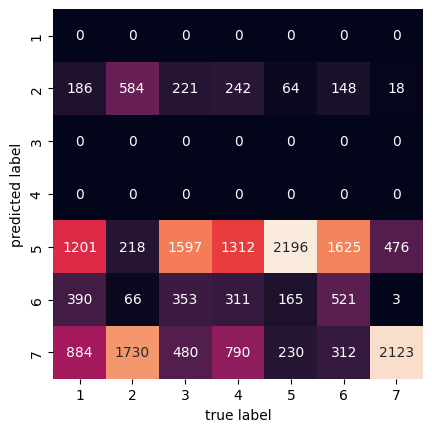

In [161]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_training, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[1,2,3,4,5,6,7],
            yticklabels=[1,2,3,4,5,6,7])
plt.xlabel('true label')
plt.ylabel('predicted label');

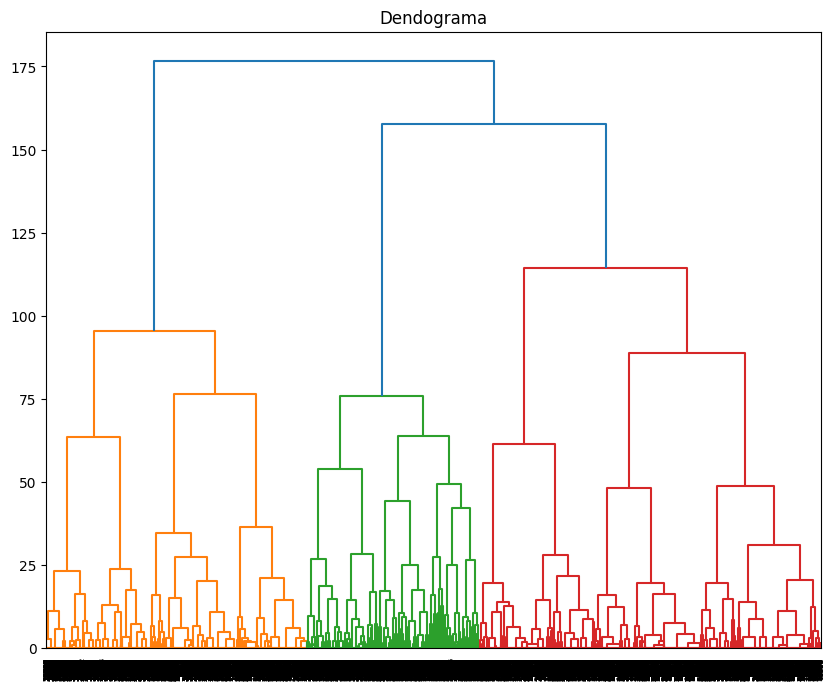

In [162]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

plt.figure(figsize=(10, 8))
plt.title("Dendograma")
Z=linkage(X_training,method='ward')
dendrogram=dendrogram(Z)